<a href="https://colab.research.google.com/github/sharifashik591/Fashion_MNIST_with_CNN-ConvolutionalNeuralNetwork-/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import matplotlib.pyplot as plt




import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.models import load_model,Sequential

In [66]:
data=tf.keras.datasets.fashion_mnist

In [67]:
(x_train,y_train), (x_test,y_test)=data.load_data()

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


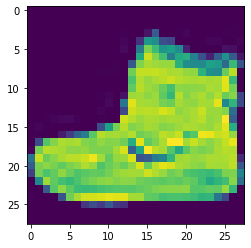

In [69]:
plt.imshow(x_train[0])


In [70]:
y_train[0]

9

In [71]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

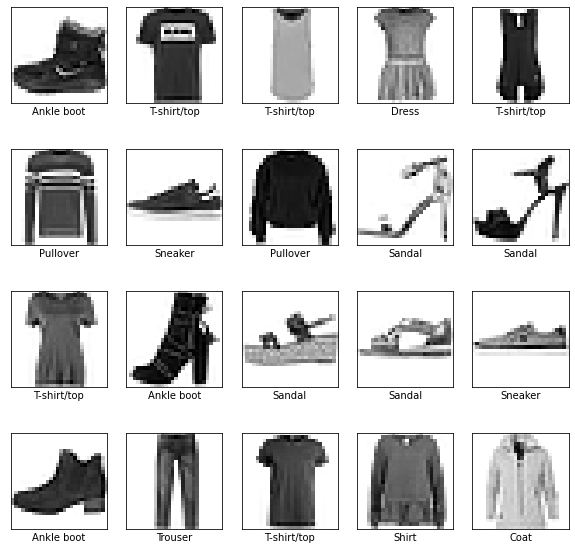

In [72]:
plt.figure(figsize=(10,10))

for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [73]:
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))


In [74]:
x_train_norm=x_train / 255.0
x_test_norm=x_test / 255.0

In [75]:
from sklearn.model_selection import train_test_split
x_test,x_val,y_test,y_val=train_test_split(x_test_norm,y_test,test_size=0.3, random_state=1)

In [76]:
x_test.shape, x_val.shape, y_test.shape, y_val.shape

((7000, 28, 28, 1), (3000, 28, 28, 1), (7000,), (3000,))

Build Model

In [14]:
model=Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=3, padding='valid',activation='relu',input_shape=[28,28,1]))
model.add(layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))




In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(x_train_norm,y_train,epochs=10, batch_size=128,verbose=1, validation_data=(x_val,y_val))

Epoch 1/10
469/469 [==============================] - 421s 897ms/step - loss: 0.2704 - accuracy: 0.9009 - val_loss: 0.2680 - val_accuracy: 0.9006
Epoch 2/10
469/469 [==============================] - 421s 898ms/step - loss: 0.2343 - accuracy: 0.9147 - val_loss: 0.2675 - val_accuracy: 0.9056
Epoch 3/10
469/469 [==============================] - 418s 892ms/step - loss: 0.2033 - accuracy: 0.9251 - val_loss: 0.2455 - val_accuracy: 0.9140
Epoch 4/10
469/469 [==============================] - 418s 891ms/step - loss: 0.1816 - accuracy: 0.9343 - val_loss: 0.2186 - val_accuracy: 0.9218
Epoch 5/10
469/469 [==============================] - 416s 887ms/step - loss: 0.1584 - accuracy: 0.9417 - val_loss: 0.2350 - val_accuracy: 0.9236
Epoch 6/10
469/469 [==============================] - 416s 887ms/step - loss: 0.1402 - accuracy: 0.9485 - val_loss: 0.2497 - val_accuracy: 0.9146
Epoch 7/10
469/469 [==============================] - 418s 892ms/step - loss: 0.1190 - accuracy: 0.9561 - val_loss: 0.2411 -

In [23]:
np.argmax(model.predict(np.expand_dims(x_test[0], axis=0)).round(2))

4

In [24]:
y_test[0]

4

In [26]:
model.evaluate(x_test,y_test)

157/157 [==============================] - 10s 65ms/step - loss: 0.2728 - accuracy: 0.9210


[0.2727966010570526, 0.9210000038146973]

In [40]:
prediction=model.predict(x_test).round(2)

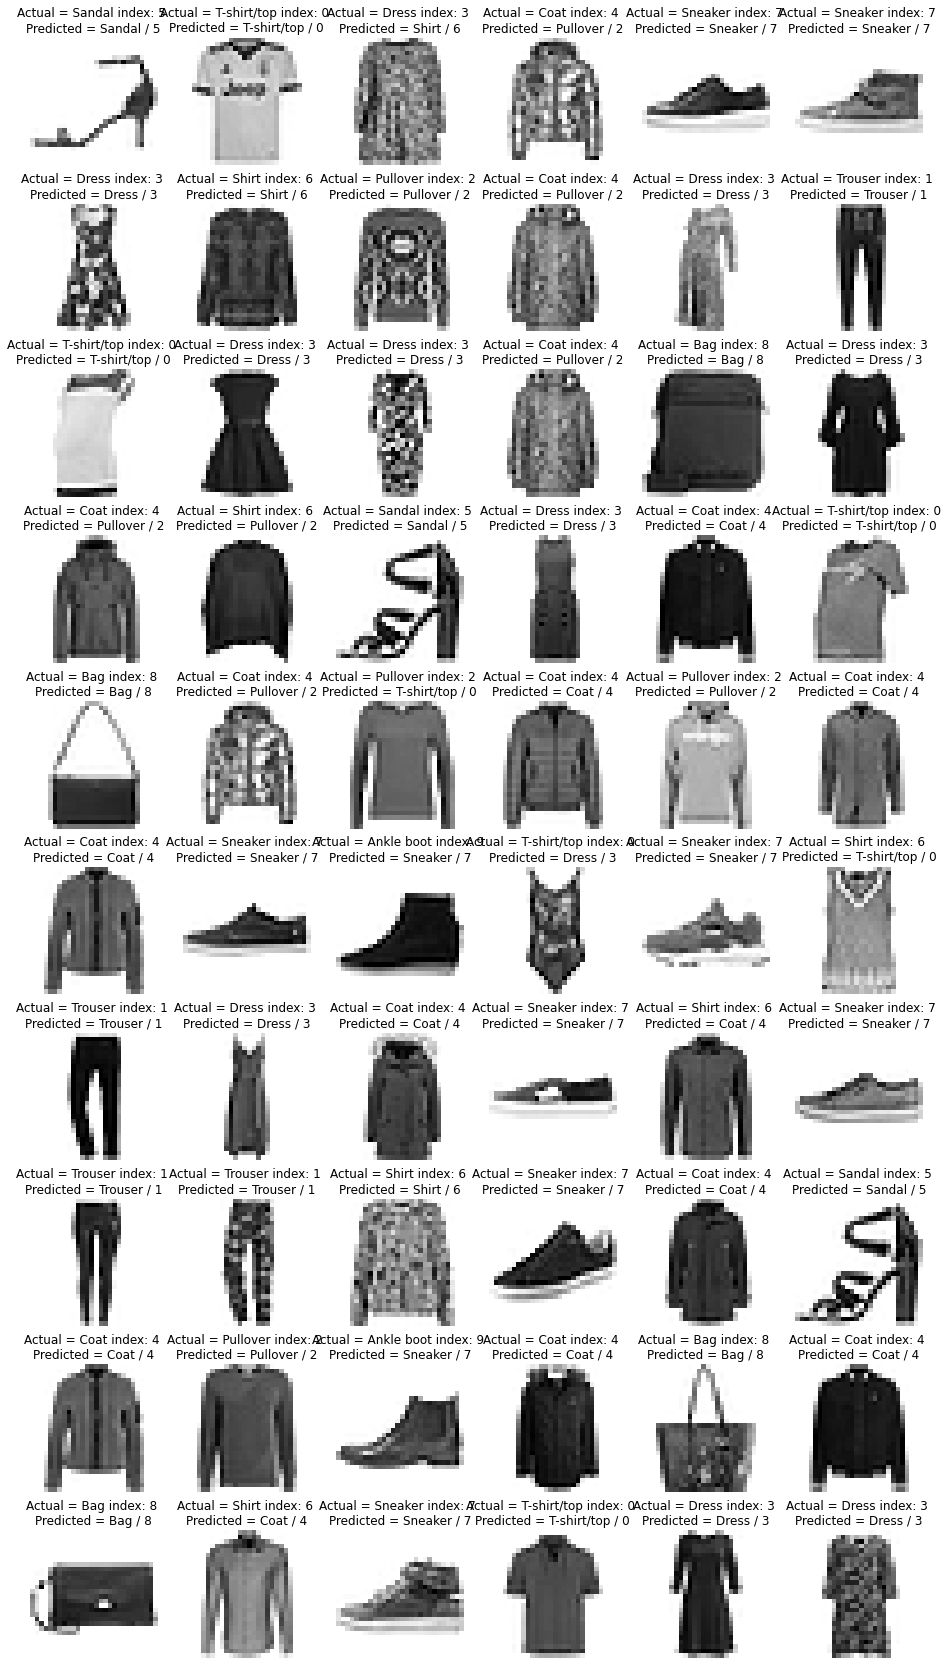

In [31]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary)
  plt.title('Actual = {} index: {} \nPredicted = {} / {}'.format(class_names[y_test[i]], y_test[i], class_names[np.argmax(prediction[i])],np.argmax(prediction[i])))
  plt.axis('off')

# Confusion matrix

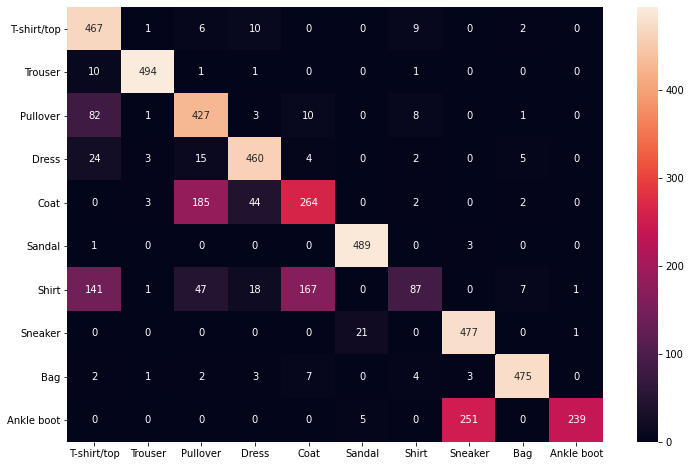

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
plt.figure(figsize=(12,8))

prediction_labels=[np.argmax(label) for label in prediction]
cm=confusion_matrix(y_test,prediction_labels)
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_names,yticklabels=class_names )

In [52]:
clr=classification_report(y_test,prediction_labels,target_names=class_names)
print(clr)

              precision    recall  f1-score   support

 T-shirt/top       0.64      0.94      0.76       495
     Trouser       0.98      0.97      0.98       507
    Pullover       0.63      0.80      0.70       532
       Dress       0.85      0.90      0.87       513
        Coat       0.58      0.53      0.55       500
      Sandal       0.95      0.99      0.97       493
       Shirt       0.77      0.19      0.30       469
     Sneaker       0.65      0.96      0.77       499
         Bag       0.97      0.96      0.96       497
  Ankle boot       0.99      0.48      0.65       495

    accuracy                           0.78      5000
   macro avg       0.80      0.77      0.75      5000
weighted avg       0.80      0.78      0.76      5000



### Model 2 (Complex Model)

In [62]:
model2 =models.Sequential([
                            layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                                  layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                                  layers.MaxPooling2D(pool_size=(2,2)),
                                  layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                                  layers.MaxPooling2D(pool_size=(2,2)),
                                  layers.Flatten(),
                                  layers.Dense(units=128, activation='relu'),
                                  layers.Dropout(0.25),
                                  layers.Dense(units=256, activation='relu'),
                                  layers.Dropout(0.5),
                                  layers.Dense(units=256, activation='relu'),
                                  layers.Dropout(0.25),                        
                                  layers.Dense(units=128, activation='relu'),
                                  layers.Dropout(0.10),                         
                                  layers.Dense(units=10, activation='softmax')
                         ])

In [63]:
model2.compile(optimizer='adam', 
               loss= 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [77]:
model2.fit(x_train_norm,
          y_train,
          epochs=30, 
          batch_size=512,
          verbose=1, 
          validation_data=(x_val,y_val))

Epoch 1/30
118/118 [==============================] - 4s 32ms/step - loss: 0.1712 - accuracy: 0.9397 - val_loss: 0.3212 - val_accuracy: 0.8957
Epoch 2/30
118/118 [==============================] - 4s 30ms/step - loss: 0.1660 - accuracy: 0.9416 - val_loss: 0.3405 - val_accuracy: 0.8933
Epoch 3/30
118/118 [==============================] - 4s 31ms/step - loss: 0.1600 - accuracy: 0.9432 - val_loss: 0.3457 - val_accuracy: 0.8963
Epoch 4/30
118/118 [==============================] - 4s 30ms/step - loss: 0.1551 - accuracy: 0.9463 - val_loss: 0.3123 - val_accuracy: 0.8953
Epoch 5/30
118/118 [==============================] - 4s 31ms/step - loss: 0.1434 - accuracy: 0.9489 - val_loss: 0.3306 - val_accuracy: 0.8940
Epoch 6/30
118/118 [==============================] - 4s 31ms/step - loss: 0.1382 - accuracy: 0.9520 - val_loss: 0.3351 - val_accuracy: 0.8977
Epoch 7/30
118/118 [==============================] - 4s 31ms/step - loss: 0.1346 - accuracy: 0.9528 - val_loss: 0.3673 - val_accuracy: 0.8860

In [78]:
model2.evaluate(x_test,y_test)

219/219 [==============================] - 1s 3ms/step - loss: 0.5143 - accuracy: 0.8966


[0.5142517685890198, 0.8965714573860168]

In [79]:
prediction2=model2.predict(x_test).round(2)

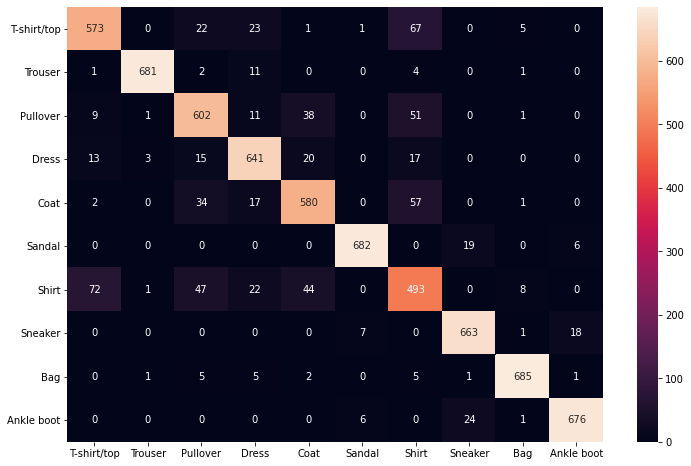

In [81]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
plt.figure(figsize=(12,8))

prediction_labels2=[np.argmax(label) for label in prediction2]
cm=confusion_matrix(y_test,prediction_labels2)
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_names,yticklabels=class_names )

In [84]:
clr=classification_report(y_test,prediction_labels2,target_names=class_names)
print(clr)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.83      0.84       692
     Trouser       0.99      0.97      0.98       700
    Pullover       0.83      0.84      0.84       713
       Dress       0.88      0.90      0.89       709
        Coat       0.85      0.84      0.84       691
      Sandal       0.98      0.96      0.97       707
       Shirt       0.71      0.72      0.71       687
     Sneaker       0.94      0.96      0.95       689
         Bag       0.97      0.97      0.97       705
  Ankle boot       0.96      0.96      0.96       707

    accuracy                           0.90      7000
   macro avg       0.90      0.90      0.90      7000
weighted avg       0.90      0.90      0.90      7000



**This model is better than previous one**

In [ ]:

print('Predction Label=',np.argmax(prediction2[10]))

In [89]:
y_test[10]

5

In [ ]:
plt.imshow(x_test[10])

In [85]:
model2.save('Fashion_mnist_cnn.h5')